In [1]:
bikes <- read.csv("~/Downloads/2013-08 - Citi Bike trip data.csv")
# sometimes it is better to use data.table::fread

In [3]:
head(bikes)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>
1,664,2013-08-01 00:00:00,2013-08-01 00:11:04,449,W 52 St & 9 Ave,40.76462,-73.98789,479,9 Ave & W 45 St,40.76019,-73.99126,20068,Subscriber,1944,1
2,2115,2013-08-01 00:00:01,2013-08-01 00:35:16,254,W 11 St & 6 Ave,40.73532,-73.99800,195,Liberty St & Broadway,40.70906,-74.01043,17095,Subscriber,1974,1
3,385,2013-08-01 00:00:03,2013-08-01 00:06:28,460,S 4 St & Wythe Ave,40.71286,-73.96590,2002,Wythe Ave & Metropolitan Ave,40.71689,-73.96320,18197,Customer,\N,0
4,653,2013-08-01 00:00:10,2013-08-01 00:11:03,398,Atlantic Ave & Furman St,40.69165,-73.99998,398,Atlantic Ave & Furman St,40.69165,-73.99998,17080,Customer,\N,0
5,954,2013-08-01 00:00:11,2013-08-01 00:16:05,319,Park Pl & Church St,40.71336,-74.00938,336,Sullivan St & Washington Sq,40.73048,-73.99906,17967,Customer,\N,0
6,145,2013-08-01 00:00:37,2013-08-01 00:03:02,521,8 Ave & W 31 St,40.75045,-73.99481,512,W 29 St & 9 Ave,40.75007,-73.99839,16299,Subscriber,1974,1


In [ ]:
# 1.) Let's investigate the age of people that used city bikes in August 2013

In [5]:
# Creation of data:
bikes$year <- as.numeric(bikes$birth.year)

Warning message in eval(expr, envir, enclos):
“NAs introduced by coercion”


In [7]:
bikes$age <- 2013 - bikes$year # the age of people using the bikes in August 2013

In [8]:
head(bikes)

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,year,age
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
1,664,2013-08-01 00:00:00,2013-08-01 00:11:04,449,W 52 St & 9 Ave,40.76462,-73.98789,479,9 Ave & W 45 St,40.76019,-73.99126,20068,Subscriber,1944,1,1944,69
2,2115,2013-08-01 00:00:01,2013-08-01 00:35:16,254,W 11 St & 6 Ave,40.73532,-73.99800,195,Liberty St & Broadway,40.70906,-74.01043,17095,Subscriber,1974,1,1974,39
3,385,2013-08-01 00:00:03,2013-08-01 00:06:28,460,S 4 St & Wythe Ave,40.71286,-73.96590,2002,Wythe Ave & Metropolitan Ave,40.71689,-73.96320,18197,Customer,\N,0,NA,NA
4,653,2013-08-01 00:00:10,2013-08-01 00:11:03,398,Atlantic Ave & Furman St,40.69165,-73.99998,398,Atlantic Ave & Furman St,40.69165,-73.99998,17080,Customer,\N,0,NA,NA
5,954,2013-08-01 00:00:11,2013-08-01 00:16:05,319,Park Pl & Church St,40.71336,-74.00938,336,Sullivan St & Washington Sq,40.73048,-73.99906,17967,Customer,\N,0,NA,NA
6,145,2013-08-01 00:00:37,2013-08-01 00:03:02,521,8 Ave & W 31 St,40.75045,-73.99481,512,W 29 St & 9 Ave,40.75007,-73.99839,16299,Subscriber,1974,1,1974,39


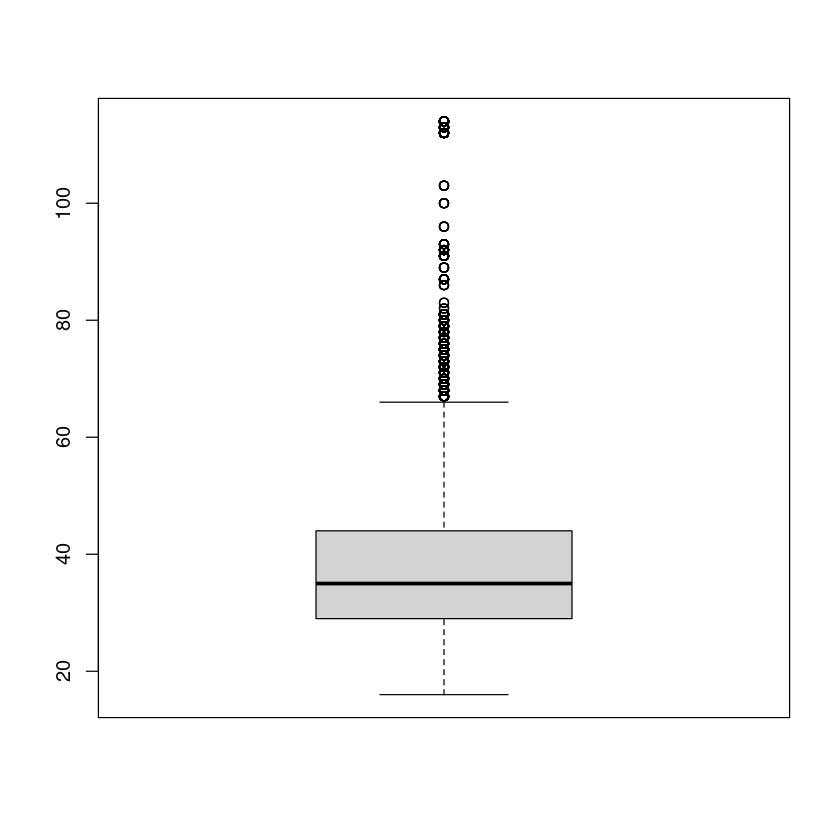

In [9]:
boxplot(bikes$age)

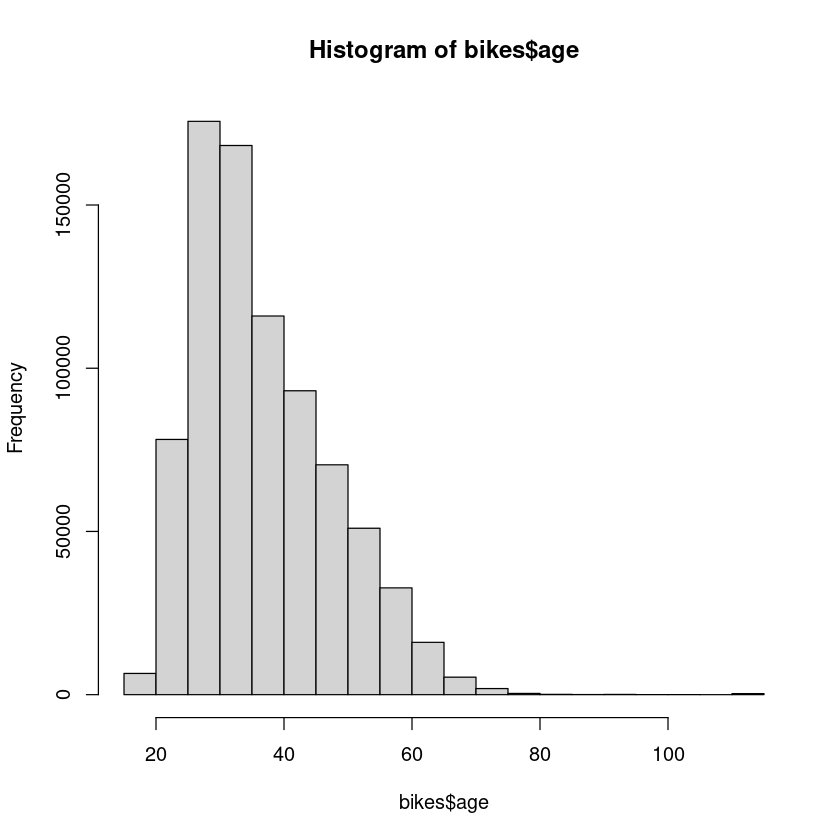

In [10]:
hist(bikes$age)

In [11]:
summary(bikes$age)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  16.00   29.00   35.00   37.24   44.00  114.00  186014 

In [13]:
groups <- split(bikes$age, bikes$gender)

In [14]:
str(groups)

List of 3
 $ 0: num [1:186096] NA NA NA NA NA NA NA NA NA NA ...
 $ 1: num [1:616914] 69 39 39 31 27 28 22 29 36 28 ...
 $ 2: num [1:198948] 30 38 24 23 31 30 36 24 50 31 ...


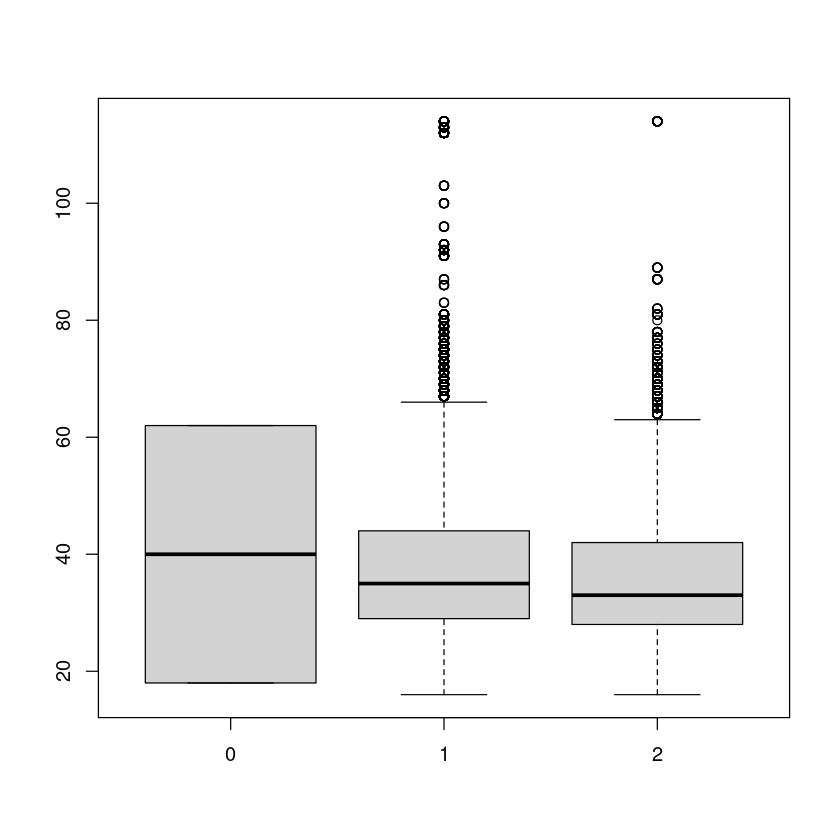

In [17]:
b <- boxplot(groups)

In [16]:
summary(groups[[1]])

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  18.00   18.00   40.00   38.65   62.00   62.00  186002 

In [18]:
typeof(b)

[1] "list"

In [19]:
str(b)

List of 6
 $ stats: num [1:5, 1:3] 18 18 40 62 62 16 29 35 44 66 ...
 $ n    : num [1:3] 94 616902 198948
 $ conf : num [1:2, 1:3] 32.8 47.2 35 35 33 ...
 $ out  : num [1:7449] 69 72 72 72 68 68 68 68 78 73 ...
 $ group: num [1:7449] 2 2 2 2 2 2 2 2 2 2 ...
 $ names: chr [1:3] "0" "1" "2"


In [21]:
summary(b$out) # outliers :)

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  64.00   67.00   69.00   71.74   72.00  114.00 

In [23]:
colnames(bikes)

[1] "tripduration"            "starttime"              
 [3] "stoptime"                "start.station.id"       
 [5] "start.station.name"      "start.station.latitude" 
 [7] "start.station.longitude" "end.station.id"         
 [9] "end.station.name"        "end.station.latitude"   
[11] "end.station.longitude"   "bikeid"                 
[13] "usertype"                "birth.year"             
[15] "gender"                  "year"                   
[17] "age"

In [25]:
# 2.) Let's look into time of the rides
trips <- bikes$tripduration/ (60*60)

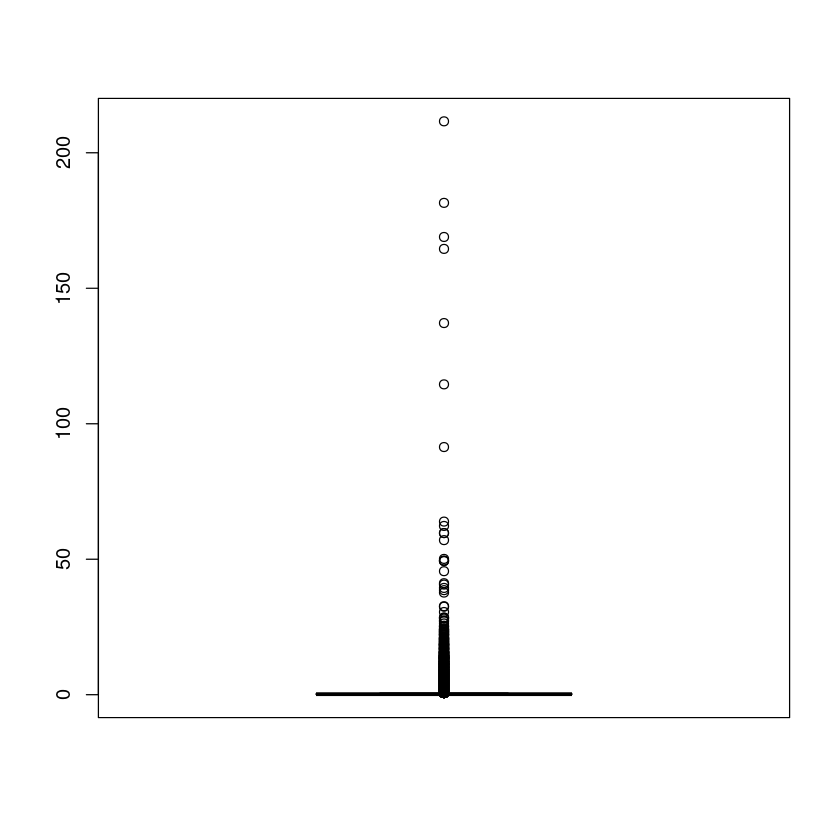

In [27]:
boxplot(trips)

In [29]:
idx <- which.max(bikes$tripduration) # the longest trip

In [30]:
bikes[idx, ]

,tripduration,starttime,stoptime,start.station.id,start.station.name,start.station.latitude,start.station.longitude,end.station.id,end.station.name,end.station.latitude,end.station.longitude,bikeid,usertype,birth.year,gender,year,age
,<int>,<chr>,<chr>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<int>,<chr>,<chr>,<int>,<dbl>,<dbl>
192364,761793,2013-08-06 21:11:40,2013-08-15 16:48:13,229,Great Jones St,40.72743,-73.99379,342,Columbia St & Rivington St,40.7174,-73.98017,15941,Subscriber,1979,1,1979,34
